In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("output/04A.pair_annotation/results_significant_annotated_categories.csv")
df = df.sort_values("pval_beta_i_on_j")
print("number of hits", len(df))
df = df.query("annotation=='known_AB_second'")
print("number of unique first mutations",len( df.position_j.unique()))
print("number of times AB evolves second", len(df))
df.to_csv("output/05.antibiotic/potentiators_significant.csv")

number of hits 32567
number of unique first mutations 652
number of times AB evolves second 3185


In [6]:
# Observation: some mutations j seem to potentiate a lot of downstream mutations i
# construct a matrix of all pairs i,j to examine which j's lead to a lot of i's
subdf = df
positions_i = list(sorted(subdf.position_i.unique()))
positions_j = list(sorted(subdf.position_j.unique()))

mat = np.zeros(shape=(len(positions_i), len(positions_j)))

for idx, row in subdf.iterrows():
    idx_i = positions_i.index(row.position_i)
    idx_j = positions_j.index(row.position_j)
    mat[idx_i, idx_j] = 1


<AxesSubplot:>

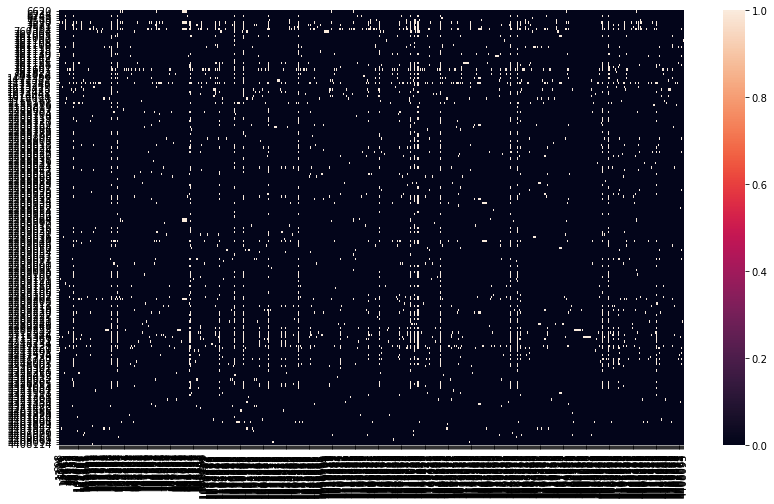

In [7]:
figure = plt.figure(figsize=(14,8))
ax = figure.gca()

sns.heatmap(mat, yticklabels = positions_i, xticklabels=positions_j)

### how often does each gene appear as a potentiator?


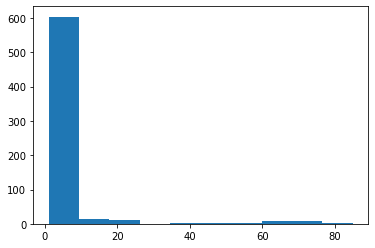

In [8]:
plt.hist(df.groupby("position_j").size())
plt.show()

In [9]:
# Recalculate matrix containing only potentiators that appear 30 or more times
newmat = mat[:,mat.sum(axis=0) > 30]
positions_j_new = np.array(positions_j)[mat.sum(axis=0) > 30]

newmat2 = newmat[newmat.sum(axis=1) > 3,:]
positions_i_new = np.array(positions_i)[newmat.sum(axis=1) > 1]

<AxesSubplot:>

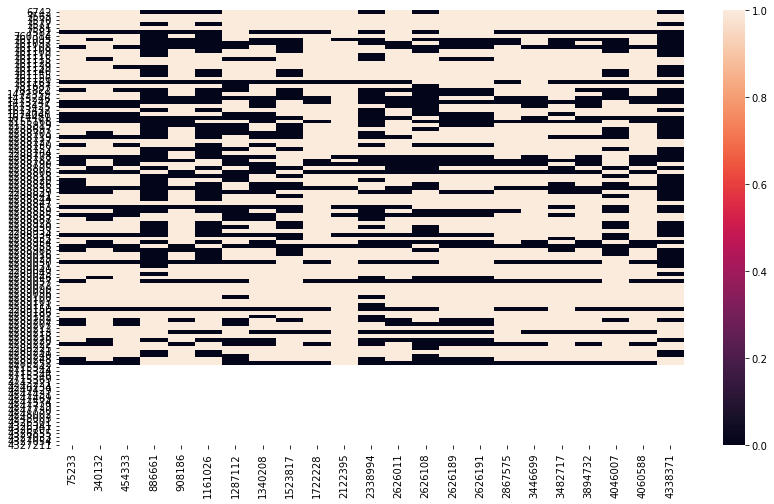

In [10]:
figure = plt.figure(figsize=(14,8))
ax = figure.gca()

sns.heatmap(newmat2, yticklabels = positions_i_new, xticklabels=positions_j_new)

In [11]:
all_snps = pd.read_csv("output/03.annotation/snps_with_gene_annotation.csv")
len(all_snps.query("pos in @positions_j_new"))

23

In [12]:
potentiators = all_snps.query("pos in @positions_j_new")
potentiators.to_csv("output/potentiator_mutations.csv")

In [13]:
potentiators

,Unnamed: 0,pos,ref,alt,gene_id,gene_pos,gene_category,gene_name,is_lineage
202,20051,75233,C,['A'],intergenic,NaN,None,None,False
493,73834,340132,G,['A'],Rv0280,768.0,PE/PPE,PPE3,False
634,95481,454333,T,['G'],Rv0376c,1103.0,Non-Essential,Rv0376c,False
1137,172856,886661,C,"['A', 'T', 'G']",intergenic,NaN,None,None,False
1154,176000,908186,T,['C'],Rv0814c,5.0,Non-Essential,sseC2,False
1364,220082,1161026,G,['A'],Rv1038c,171.0,Antigen,esxJ,False
1498,241057,1287112,T,['C'],intergenic,NaN,None,None,False
1585,250896,1340208,G,['A'],Rv1196,859.0,PE/PPE,PPE18,False
1814,281752,1523817,C,['T'],Rv1355c,1932.0,Non-Essential,moeY,False
1990,315778,1722228,A,"['C', 'T', 'G']",Rv1527c,145.0,Non-Essential,pks5,False


In [14]:
## how many pairs have potentiator as initial mutation
df.query("position_j in @positions_j_new")

,Unnamed: 0,position_i,gene_name_i,position_j,gene_name_j,n_mutations_i,n_mutations_j,n_branches_with_i,n_branches_with_j,n_muts_i_on_branch_j,...,possible_drug_i,in_antigen_epitope_j,in_antigen_protein_j,in_known_ABR_position_j,known_drug_j,in_possible_ABR_gene_j,possible_drug_j,median_distance,annotation,mutation_distance
12364,3891,781687,rpsL,75233,None,918,44,5303,24274,710,...,STM,False,False,False,NaN,False,NaN,696.069712,known_AB_second,706454
12425,7896,781687,rpsL,1722228,pks5,918,13,5303,16173,594,...,STM,False,False,False,NaN,False,NaN,NaN,known_AB_second,940541
12500,11209,781687,rpsL,4060588,esxW,918,117,5303,16379,591,...,STM,True,True,False,NaN,False,NaN,703.788162,known_AB_second,1132631
12572,14641,781687,rpsL,3446699,Rv3081,918,83,5303,16441,589,...,STM,False,False,False,NaN,False,NaN,510.038518,known_AB_second,1746520
12643,18026,781687,rpsL,2867575,lppB,918,25,5303,16157,585,...,STM,False,False,False,NaN,False,NaN,703.253940,known_AB_second,2085888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12475,8521,2288703,pncA,1722228,pks5,15,13,18,16173,9,...,PZA,False,False,False,NaN,False,NaN,109.208507,known_AB_second,566475
12477,8615,2288847,pncA,1722228,pks5,15,13,74,16173,9,...,PZA,False,False,False,NaN,False,NaN,113.085082,known_AB_second,566619
12497,9005,2288730,pncA,1722228,pks5,15,13,6,16173,9,...,PZA,False,False,False,NaN,False,NaN,109.948506,known_AB_second,566502
13604,79672,2289231,pncA,4046007,Rv3603c,37,5,82,6586,11,...,PZA,False,False,False,NaN,False,NaN,122.533620,known_AB_second,1756776


In [15]:
1431/len(df)

0.44929356357927785